<a href="https://colab.research.google.com/github/utkarsh8273/MEMES_VS_NOTES/blob/master/Memes_Vs_Notes(without_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import glob
import cv2

In [21]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [22]:
path_meme = glob.glob('/content/gdrive/My Drive/Stage_2/Memes/*.jpg')
path_notes = glob.glob('/content/gdrive/My Drive/Stage_2/Notes/*.jpg')
X_train = np.zeros((12288,1000))
Y_train = np.zeros((1,1000))
X_val = np.zeros((12288,300))
Y_val = np.zeros((1,300))
X_test = np.zeros((12288,300))
Y_test = np.zeros((1,300))
k = 0
for i in path_meme :
  img = cv2.imread(i)
  img = np.array(cv2.resize(img,(64,64)))
  img = img.reshape(-1)
  if k<500 :
    X_train[:,k] = np.copy(img)
    Y_train[:,k] = 1
  elif k >= 500 and k < 650:
    X_val[:,k-500] = np.copy(img)
    Y_val[:,k-500] = 1
  elif k >= 650 and k < 800 :
    X_test[:,k-650] = np.copy(img)
    Y_test[:,k-650] = 1
  else :
    break
  k = k + 1
  print(k)
k = 500
for i in path_notes :
  img = cv2.imread(i)
  img = np.array(cv2.resize(img,(64,64)))
  img = img.reshape(-1)
  if k<1000 :
    X_train[:,k] = np.copy(img)
    Y_train[:,k] = 0
  elif k>=1000 and k<1150 :
    X_val[:,k-850] = np.copy(img)
    Y_val[:,k-850] = 0
  elif k >= 1150 and k < 1300 :
    X_test[:,k-1000] = np.copy(img)
    Y_test[:,k-1000] = 0
  k = k + 1
  print(k)
print(X_val.shape)
print(Y_val.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
shuffle_index = np.random.permutation(X_train.shape[1])
X_train,Y_train = X_train[:,shuffle_index] , Y_train[:,shuffle_index]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [23]:
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255
n = X_train.shape[0]
m = X_train.shape[1]
print(n)
print(m)
def sigmoid(z) :
  return (1/(1+np.exp(-z)))
def relu(X) :
  X[X<0]=0
  return X

12288
1000


In [24]:
def initialize_wts(struct) :
  W = {}
  b = {}
  for i in range(1,len(struct)) :
    W["W" + str(i)] = np.random.randn(struct[i],struct[i-1])*np.sqrt(2/struct[i-1])
    b["b" + str(i)] = np.zeros((struct[i],1))
  return W,b
def forward_prop(X_train,W,b) :
  return relu(np.dot(W,X_train) + b)

In [25]:
def model(struct,X_train,Y_train,lr,num_itr,W,b,vdw,vdb) :
  beta = 0.9
  n = X_train.shape[0]
  m = X_train.shape[1]
  for k in range(0,num_itr) :
    A = {}
    A["A" + str(0)] = X_train
    for i in range(1,len(struct)-1) :
      A["A" + str(i)] = forward_prop(A["A" + str(i-1)],W["W" + str(i)],b["b" + str(i)])
    A["A" + str(len(struct) - 1)] = sigmoid(np.dot(W["W" + str(len(struct) - 1)] , A["A" + str(len(struct) - 2)]) + b["b" + str(len(struct) - 1)])
    dW = {}
    db = {}
    dZ = {}
    dZ["dZ" + str(len(struct) - 1)] = A["A" + str(len(struct) - 1)] - Y_train
    dW["dW" + str(len(struct) - 1)] = (1/m)*(np.dot(dZ["dZ" + str(len(struct) - 1)],A["A" + str(len(struct) - 2)].T))
    db["db" + str(len(struct) - 1)] = (1/m)*(np.sum(dZ["dZ" + str(len(struct) - 1)],axis = 1, keepdims = True))
    for i in range(0,len(W) - 1) :
      dZ["dZ" + str(len(W) - 1 - i)] = np.dot(W["W" + str(len(W) - i)].T,dZ["dZ" + str(len(W) - i)])*np.int64(A["A" + str(len(W) - 1 - i)] > 0)
      dW["dW" + str(len(W) - 1 - i)] = (1/m)*np.dot(dZ["dZ" + str(len(W) - 1 - i)] , A["A" + str(len(W) - 1 - i - 1)].T)
      db["db" + str(len(W) - i - 1)] = (1/m)*np.sum(dZ["dZ" + str(len(W) - 1 - i)],axis = 1,keepdims = True)
    for i in range(1,len(W) + 1) :
      vdw["vdw" + str(i)] = beta*vdw["vdw" + str(i)] + (1-beta)*dW["dW" + str(i)]
      vdb["vdb" + str(i)] = beta*vdb["vdb" + str(i)] + (1-beta)*db["db" + str(i)]
      W["W" + str(i)] = W["W" + str(i)] - lr*vdw["vdw" + str(i)]
      b["b" + str(i)] = b["b" + str(i)] - lr*vdb["vdb" + str(i)]
    cost = (-1/m)*(np.dot(Y_train,np.log(A["A" + str(len(struct) - 1)]).T) + np.dot(1 - Y_train,np.log(1 - A["A" + str(len(struct) - 1)]).T))
  return W,b,A["A" + str(len(struct) - 1)],cost,vdw,vdb

In [26]:
def train(struct,X_train,Y_train,lr,epochs,batch_size) :
  W,b = initialize_wts(struct)
  vdw = {}
  vdb = {}
  cost_train = []
  cost_val = []
  for i in range(1,len(W) + 1) :
    vdw["vdw" + str(i)] = 0
    vdb["vdb" + str(i)] = 0
  for j in range(epochs) :
    for k in range(1,int(X_train.shape[1]/batch_size)+1) :
      X = X_train[:,(k-1)*batch_size:k*batch_size]
      Y = Y_train[:,(k-1)*batch_size:k*batch_size]
      W,b,A,cost_t,vdw,vdb = model(struct , X , Y ,lr, num_itr = 1,W = W,b = b,vdw = vdw,vdb = vdb)
      A_val = {}
      A_val["A" + str(0)] = X_val
      for i in range(1,len(struct)-1) :
        A_val["A" + str(i)] = forward_prop(A_val["A" + str(i-1)],W["W" + str(i)],b["b" + str(i)])
      A_val["A" + str(len(struct) - 1)] = sigmoid(np.dot(W["W" + str(len(struct) - 1)] , A_val["A" + str(len(struct) - 2)]) + b["b" + str(len(struct) - 1)])
      cost_v = (-1/X_val.shape[1])*(np.dot(Y_val,np.log(A_val["A" + str(len(struct) - 1)]).T) + np.dot(1 - Y_val,np.log(1 - A_val["A" + str(len(struct) - 1)]).T))
      cost_train.append(float(cost_t))
      cost_val.append(float(cost_v))
      print("Epoch : {}  Data Passed ({}/{})  Training Loss : {}  Validaton Loss : {}".format(j+1,k*batch_size,X_train.shape[1],float(cost_t),float(cost_v)))
  plt.plot(list(range(epochs*(int(X_train.shape[1]/batch_size)))),cost_train)
  plt.plot(list(range(epochs*(int(X_train.shape[1]/batch_size)))),cost_val)
  plt.show()
  return W,b,A

Epoch : 1  Data Passed (100/1000)  Training Loss : 0.7155883306420319  Validaton Loss : 0.7206627604820839
Epoch : 1  Data Passed (200/1000)  Training Loss : 0.5982121158262442  Validaton Loss : 0.6931891299041867
Epoch : 1  Data Passed (300/1000)  Training Loss : 0.5604117088265855  Validaton Loss : 0.6167572325023558
Epoch : 1  Data Passed (400/1000)  Training Loss : 0.4661058537644042  Validaton Loss : 0.5670537558372891
Epoch : 1  Data Passed (500/1000)  Training Loss : 0.4409758397549999  Validaton Loss : 0.5276784957366192
Epoch : 1  Data Passed (600/1000)  Training Loss : 0.41732670231478736  Validaton Loss : 0.4894620403466572
Epoch : 1  Data Passed (700/1000)  Training Loss : 0.3511615799115072  Validaton Loss : 0.45960111049153857
Epoch : 1  Data Passed (800/1000)  Training Loss : 0.34411502679857964  Validaton Loss : 0.41994933878610163
Epoch : 1  Data Passed (900/1000)  Training Loss : 0.30078469843374706  Validaton Loss : 0.3868604088198552
Epoch : 1  Data Passed (1000/100

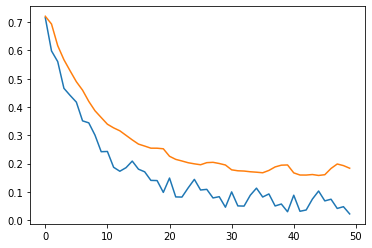

In [27]:
W,b,A = train([n,6000,2000,1000,500,100,20,1],X_train,Y_train,0.01,5,100)

In [28]:
def modelp(X_train,Y_train,W,b) :
  strr = len(W) + 1
  n = X_train.shape[0]
  m = X_train.shape[1]
  A = {}
  A["A" + str(0)] = X_train
  for i in range(1,strr-1) :
    A["A" + str(i)] = forward_prop(A["A" + str(i-1)],W["W" + str(i)],b["b" + str(i)])
  A["A" + str(strr - 1)] = sigmoid(np.dot(W["W" + str(strr - 1)] , A["A" + str(strr - 2)]) + b["b" + str(strr - 1)])
  return A["A" + str(strr - 1)]
def pred(A,Y) :
  pred = np.zeros(A.shape)
  for i in range(0,A.shape[1]) :
    if A[0,i] >= 0.50 :
      pred[0,i] = 1
  fai = np.absolute(pred - Y)
  accuracy = 1 - (np.sum(fai)/Y.shape[1])
  return accuracy*100
A_train = modelp(X_train , Y_train ,W,b)
Acc_train = pred(A_train,Y_train)
print("Train accuracy is ", Acc_train)
A_val = modelp(X_val , Y_val ,W,b)
Acc_val = pred(A_val,Y_val)
print("Validation accuracy is ", Acc_val)
A_test = modelp(X_test , Y_test ,W,b)
Acc_test = pred(A_test,Y_test)
print("Test accuracy is ", Acc_test)

Train accuracy is  99.1
Validation accuracy is  94.33333333333334
Test accuracy is  93.33333333333333
